http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

https://github.com/opencv/opencv/blob/master/samples/python/facedetect.py

`pip install opencv-python`

In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import signal
%matplotlib inline

In [3]:
cv2.__version__

'3.4.2'

In [4]:
# img_file = 'obama.jpg' # Doesn't find any features
img_file = 'me.jpg'

(400, 400)
<class 'numpy.ndarray'>


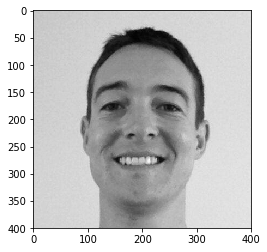

In [5]:
img = cv2.imread(img_file,0)
h,w = img.shape[:2]
print(img.shape)
print(type(img))
plt.imshow(img, cmap='gray')
plt.show()

HA component uses the following line but this returns nonetype

In [6]:
cv_image = cv2.imdecode(np.asarray(bytearray(img)), cv2.IMREAD_UNCHANGED)

In [7]:
type(cv_image)

NoneType

In [8]:
np.asarray(bytearray(img)).shape

(160000,)

## Image classification 
Follow steps from https://github.com/home-assistant/home-assistant/blob/dev/homeassistant/components/image_processing/opencv.py

Use defaults

In [9]:
!ls *.xml

haarcascade_eye.xml                 lbp_frontalface.xml
haarcascade_frontalface_default.xml


In [10]:
DEFAULT_MIN_SIZE = (30, 30)
DEFAULT_NEIGHBORS = 4
DEFAULT_SCALE = 1.1

In [11]:
classifier = 'lbp_frontalface.xml' # Default loaded by HA.

In [12]:
cascade = cv2.CascadeClassifier(classifier) # A CascadeClassifier object
# cascade.load(classifier)

In [13]:
def detect(img, cascade):
    rects = cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
    if len(rects) == 0:
        return []
    rects[:,2:] += rects[:,:2]
    return rects

In [14]:
rects = detect(img, cascade)
rects

[]

This is behaviour we see from the HA component, no errors but no detections either - something wrong with the model?

## Offical models
Models from https://github.com/opencv/opencv/tree/master/data/haarcascades

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [16]:
img.shape

(400, 400)

In [17]:
faces = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

In [18]:
faces

array([[ 64,  61, 278, 278]], dtype=int32)

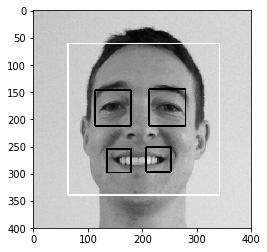

In [19]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img, cmap='gray');

## Person detection
Article http://funvision.blogspot.com/2016/03/opencv-31-people-detection-at-13-fps-by.html

Use https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_fullbody.xml

In [22]:
people_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

In [23]:
img_file = 'people.jpg'

(400, 600)
<class 'numpy.ndarray'>


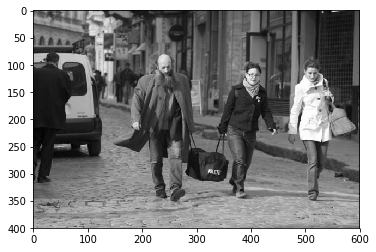

In [24]:
img = cv2.imread(img_file,0)
h,w = img.shape[:2]
print(img.shape)
print(type(img))
plt.imshow(img, cmap='gray')
plt.show()

In [29]:
people = people_cascade.detectMultiScale(img, scaleFactor=1.02, minNeighbors=5, minSize=(40, 70))

In [30]:
people

array([[ 94,  96,  48,  96],
       [158,  74, 151, 301],
       [423,  57, 160, 320]], dtype=int32)

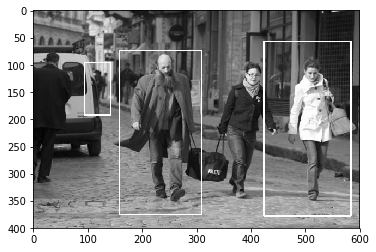

In [31]:
for (x,y,w,h) in people:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi = img[y:y+h, x:x+w]
    eyes = people_cascade.detectMultiScale(roi)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img, cmap='gray');

## Video

https://medium.com/@neotheicebird/webcam-based-image-processing-in-ipython-notebooks-47c75a022514

In [20]:
# vc = cv2.VideoCapture(0)

In [21]:
# plt.ion()